<a href="https://colab.research.google.com/github/JuanMiguelSanchezAguilar/Examen2P_IA/blob/main/Examen2P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IA-1 Genuino:
*   Maria Fernanda Hernandez Hervert
*   Juan Miguel Sanchez Aguilar
*   Marco Antonio Vazquez Aguilar

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Funcion a evaluar
### Esta la hemos cambiado un poco a la del video de ejemplo y se recomienda que siempre sea una no lineal ya que este tipo de algoritmos estan hechos para este tipo de funciones.

In [74]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.sin(6*math.pi*(1-x)))+2

## Gráfica
### Se especifica los rangos de la grafica y se implementa la función dentro.

In [75]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

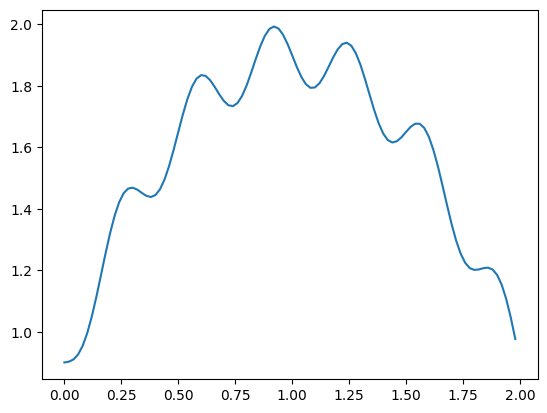

In [76]:
plt.plot(x_axis,y_axis)

In [77]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

##Genera población
###Especifica como seran los individuos y posteriormente crea la población

In [78]:
ind_size = 15
#Genetic pool
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

In [79]:
poblacion = []

for i in range(100):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)
poblacion[:10]

[[0, 3, 0, 7, 4, 1, 3, 4, 3, 7, 9, 6, 7, 1, 3],
 [1, 0, 1, 6, 7, 5, 2, 4, 2, 2, 7, 1, 2, 9, 8],
 [1, 8, 5, 4, 6, 6, 3, 4, 1, 1, 8, 0, 3, 0, 6],
 [1, 0, 4, 6, 9, 6, 9, 2, 2, 5, 5, 3, 1, 6, 9],
 [1, 2, 6, 7, 9, 8, 5, 7, 5, 0, 6, 9, 3, 0, 8],
 [1, 1, 4, 5, 9, 0, 6, 2, 6, 1, 1, 7, 1, 5, 9],
 [0, 1, 9, 2, 6, 0, 5, 0, 7, 5, 4, 0, 5, 6, 7],
 [1, 8, 0, 3, 2, 5, 4, 5, 0, 0, 2, 2, 5, 3, 1],
 [1, 7, 9, 8, 3, 6, 4, 6, 1, 9, 6, 1, 9, 9, 0],
 [0, 9, 3, 3, 3, 2, 4, 5, 6, 7, 3, 1, 9, 3, 1]]

### Imprime los individuos distribuidos en la función

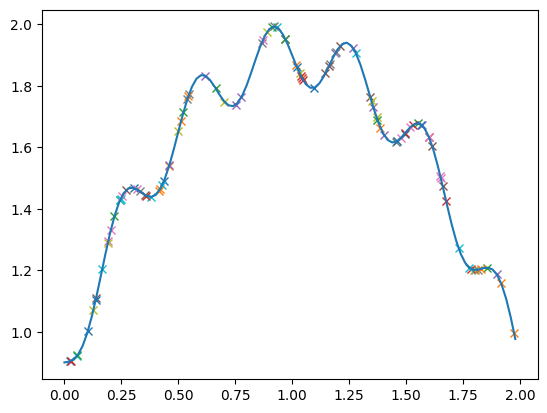

In [80]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

## Evaluar
### Evalua el nivel de exito que tendran los individuos dada la función y de esta forma saber los que conviene que se reproduzcan.

In [81]:
fitness =[]

for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]

fitness = np.array(fitness)

fitness=fitness/fitness.sum()

In [82]:
fitness

array([0.00939416, 0.01196415, 0.00773861, 0.01165502, 0.01230879,
       0.01178428, 0.00829178, 0.0076899 , 0.00769179, 0.01274527,
       0.00642105, 0.01065244, 0.01074381, 0.01071232, 0.01113073,
       0.00934571, 0.01044695, 0.01197069, 0.0103691 , 0.00588844,
       0.01192208, 0.00937313, 0.01097689, 0.00771621, 0.01050192,
       0.01026985, 0.00965725, 0.01036293, 0.01057621, 0.00773613,
       0.00955338, 0.00984837, 0.01275226, 0.0116914 , 0.01220621,
       0.00709661, 0.00937251, 0.0124214 , 0.00686505, 0.00921036,
       0.01148717, 0.0107975 , 0.00915665, 0.00913415, 0.01173905,
       0.01250286, 0.00851504, 0.01223047, 0.01086916, 0.00771439,
       0.00578562, 0.00933713, 0.01082431, 0.01045074, 0.00987811,
       0.01194309, 0.01248349, 0.01134842, 0.01178574, 0.0081462 ,
       0.00706711, 0.00637215, 0.00880577, 0.00579874, 0.01108105,
       0.01128726, 0.01066235, 0.009328  , 0.01119698, 0.00915548,
       0.01037829, 0.01131496, 0.0125003 , 0.00923928, 0.00760

## Mutación
### Para tener diversidad de datos se integra la probabilidad de que un dato de algún  de un individuo se cambie aleatoriamente pero el cambio es muy poco probable, ademas de que es minimo ya que si cambia a ser un dato totalmente distinto la informacion obtenida ya seria poco util.

In [83]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]

        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [84]:
mutate(poblacion,0.003,genetic_pool)
poblacion[:10]

[[0, 3, 0, 7, 4, 1, 3, 4, 3, 7, 9, 6, 7, 1, 3],
 [1, 0, 1, 6, 7, 5, 2, 4, 2, 2, 7, 1, 2, 9, 8],
 [1, 8, 5, 4, 6, 6, 3, 4, 1, 1, 8, 0, 3, 0, 6],
 [1, 0, 4, 6, 9, 6, 9, 2, 2, 5, 5, 3, 1, 6, 9],
 [1, 2, 6, 7, 9, 8, 5, 7, 5, 0, 6, 9, 3, 0, 8],
 [1, 1, 4, 5, 9, 0, 6, 2, 6, 1, 1, 7, 1, 5, 9],
 [0, 1, 9, 2, 6, 0, 5, 0, 7, 5, 4, 0, 5, 6, 7],
 [1, 8, 0, 3, 2, 5, 4, 5, 0, 0, 2, 2, 5, 3, 1],
 [1, 7, 9, 8, 3, 6, 4, 6, 1, 9, 6, 1, 9, 9, 0],
 [0, 9, 3, 3, 3, 2, 4, 5, 6, 7, 3, 1, 9, 3, 1]]

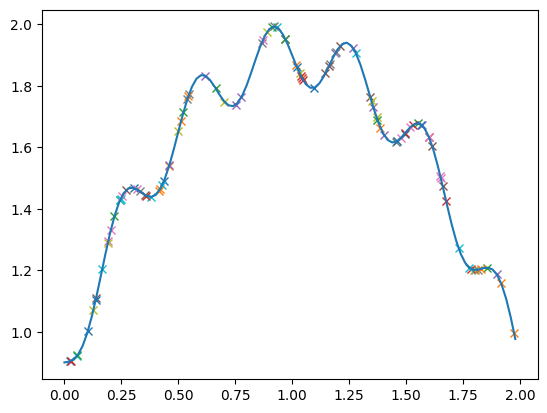

In [85]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [86]:
size_poblacion = len(poblacion)

## Proceso completo
### Aqui se lleva a cabo el proceso anterior pero en un solo modulo y realiza 1oo generaciones es decir el algoritmo hace evolucionar 100 veces a la población

In [87]:
generaciones = 200

for _ in range(generaciones):

    fitness =[]

    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    fitness = np.array(fitness)

    fitness=fitness/fitness.sum()


    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

    poblacion = offspring


    mutate(poblacion,0.005,genetic_pool)


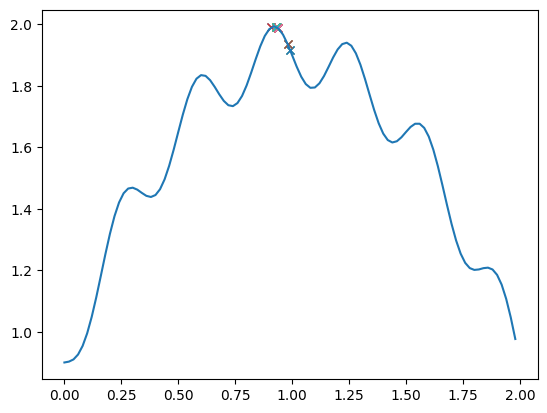

In [88]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [89]:
listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

0.9093816560364801

Aqui hacemos el mismo proceso pero con 500 generaciones.

In [90]:
generaciones = 500

for _ in range(generaciones):

    fitness =[]

    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    fitness = np.array(fitness)

    fitness=fitness/fitness.sum()


    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

    poblacion = offspring


    mutate(poblacion,0.005,genetic_pool)


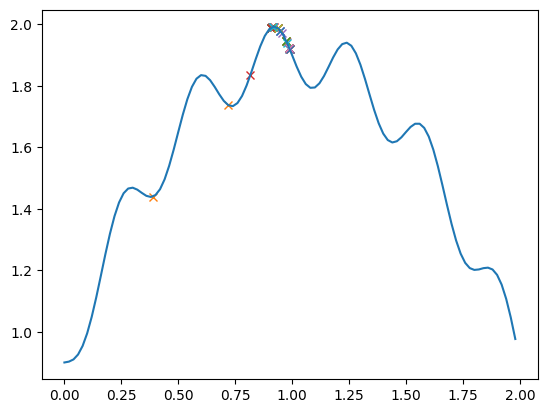

In [91]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [92]:
listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

0.98863536368466